<a href="https://colab.research.google.com/github/iamabhishek2828/DSA/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from random import randint

# Data Loading

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 342M/346M [00:03<00:00, 81.6MB/s]
100% 346M/346M [00:03<00:00, 115MB/s] 


In [ ]:
!unzip intel-image-classification.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/seg_train/seg_train/mountain/7506.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7537.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7539.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7551.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7560.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7565.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7578.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7581.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7586.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7647.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7652.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7654.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7662.jpg  
  inflating: dataset/seg_train/seg_train/mountain/767.jpg  
  inflating: dataset/seg_train/seg_train/mountain/7672.jpg  
  inflating: dataset/seg_train/seg_

# Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_loader = img_gen.flow_from_directory(
    directory = "/content/dataset/seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42
)

test_loader = img_gen.flow_from_directory(
    directory = "/content/dataset/seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42
)

Found 14034 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [ ]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
idx_to_classes = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

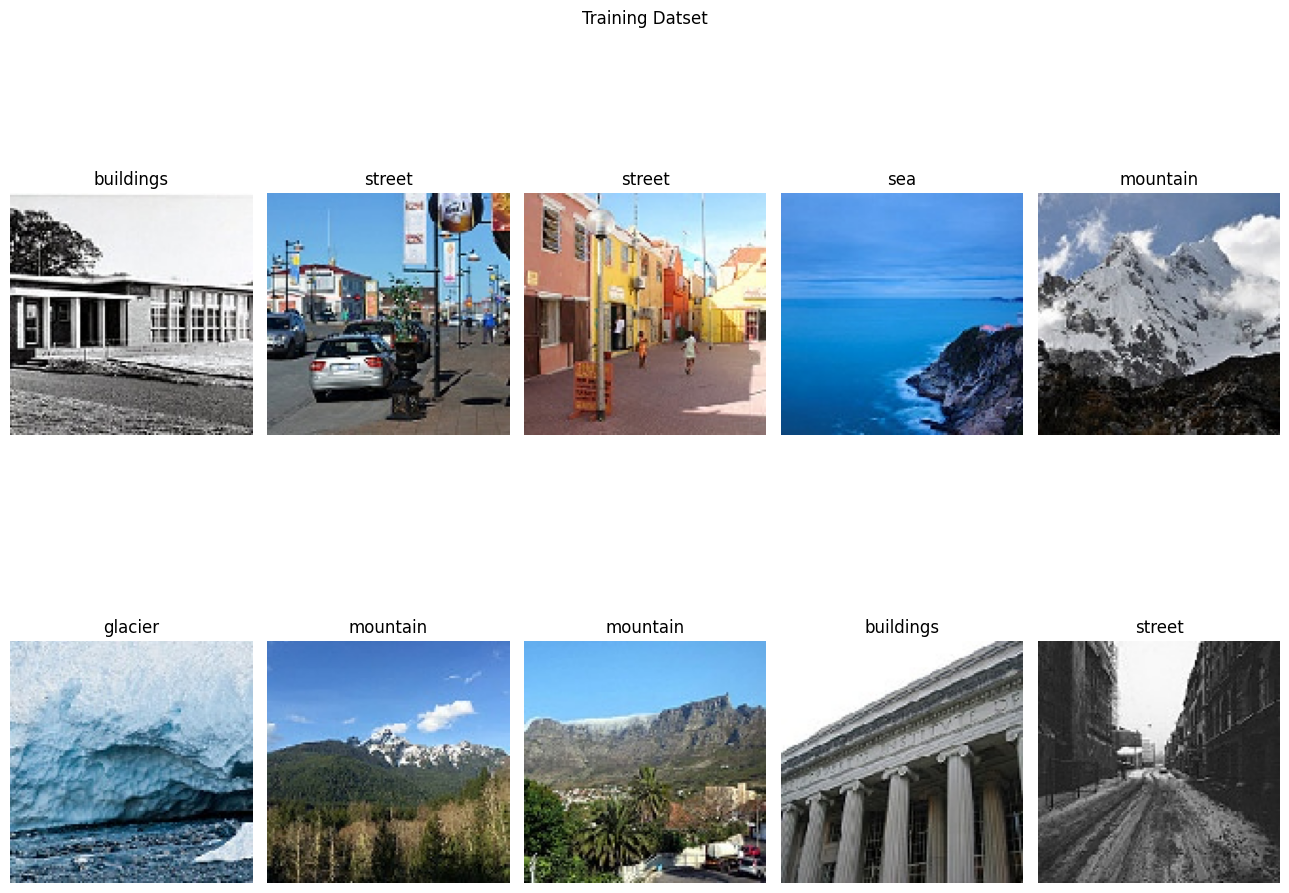

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(13, 11))
idx = 0

for i in range(2):
    for j in range(5):
        label= idx_to_classes[np.argmax(train_loader[0][1][idx])]
        ax[i, j].set_title(f'{label}')
        ax[i, j].imshow(train_loader[0][0][idx][:, :, :])
        ax[i, j].axis('off')
        idx += 1

plt.tight_layout()
plt.suptitle('Training Datset')
plt.show()

# CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 average_pooling2d_2 (Avera  (None, 42, 42, 32)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_2 (Bat  (None, 42, 42, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 average_pooling2d_3 (Avera  (None, 13, 13, 64)       

In [ ]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
train_steps = len(train_loader)
test_steps = len(test_loader)

In [ ]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch = train_steps,
    epochs = 10,
    validation_data = test_loader,
    validation_steps = test_steps
)

Epoch 1/10


<ipython-input-41-b73dffb479d3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


281/281 [==============================] - 358s 1s/step - loss: 1.4993 - accuracy: 0.5092 - val_loss: 1.6384 - val_accuracy: 0.3203
Epoch 2/10
281/281 [==============================] - 306s 1s/step - loss: 1.0211 - accuracy: 0.6318 - val_loss: 0.8362 - val_accuracy: 0.6992
Epoch 3/10
281/281 [==============================] - 295s 1s/step - loss: 0.8504 - accuracy: 0.6836 - val_loss: 1.3111 - val_accuracy: 0.6540
Epoch 4/10
281/281 [==============================] - 351s 1s/step - loss: 0.7520 - accuracy: 0.7180 - val_loss: 1.1312 - val_accuracy: 0.6002
Epoch 5/10
281/281 [==============================] - 353s 1s/step - loss: 0.6935 - accuracy: 0.7436 - val_loss: 1.2897 - val_accuracy: 0.6020
Epoch 6/10
281/281 [==============================] - 355s 1s/step - loss: 0.6312 - accuracy: 0.7646 - val_loss: 0.7153 - val_accuracy: 0.7222
Epoch 7/10
281/281 [==============================] - 294s 1s/step - loss: 0.5707 - accuracy: 0.7869 - val_loss: 0.5603 - val_accuracy: 0.8094
Epoch 8/10

# Model Performance

In [ ]:
import pandas as pd



history_df = pd.DataFrame(train_metrics.history)
history_df


,loss,accuracy,val_loss,val_accuracy
0,1.499275,0.509192,1.638382,0.320294
1,1.021094,0.631751,0.836183,0.699159
2,0.850354,0.683554,1.311060,0.653983
3,0.751987,0.717971,1.131157,0.600185
4,0.693491,0.743623,1.289718,0.601967
5,0.631199,0.764643,0.715303,0.722246
6,0.570740,0.786875,0.560345,0.809391
7,0.562803,0.789012,0.681866,0.756021
8,0.516026,0.807610,0.618921,0.771555
9,0.473727,0.822574,0.504965,0.823999


In [ ]:
train_loss = history_df["loss"]
train_accuracy = history_df["accuracy"]
test_loss = history_df["val_loss"]
test_accuracy = history_df["val_accuracy"]

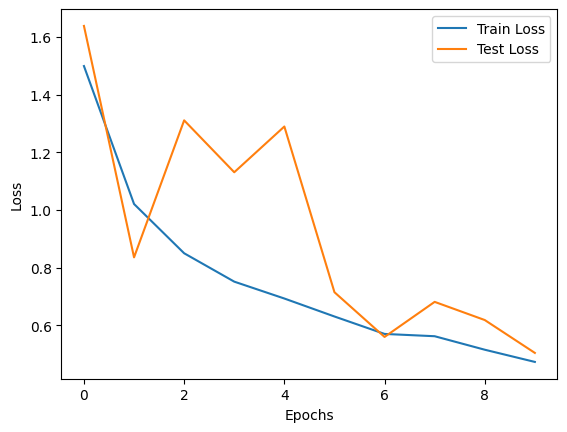

In [ ]:
plt.plot(range(10), train_loss, label = "Train Loss")
plt.plot(range(10), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

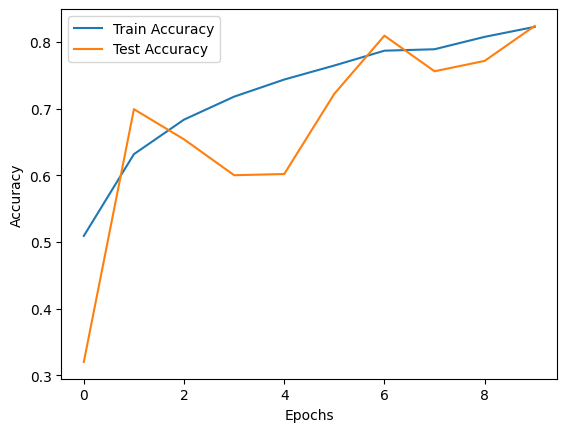

In [ ]:
plt.plot(range(10), train_accuracy, label = "Train Accuracy")
plt.plot(range(10), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Making Prediction from the model

In [ ]:
pred_list = [f"/content/dataset/seg_train/seg_train/{i}" for i in os.listdir("/content/dataset/seg_train/seg_train")]
pred_list

['/content/dataset/seg_train/seg_train/street',
 '/content/dataset/seg_train/seg_train/sea',
 '/content/dataset/seg_train/seg_train/buildings',
 '/content/dataset/seg_train/seg_train/mountain',
 '/content/dataset/seg_train/seg_train/glacier',
 '/content/dataset/seg_train/seg_train/forest']

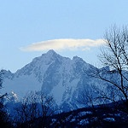

Model Prediction:  mountain


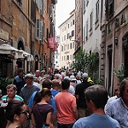

Model Prediction:  street


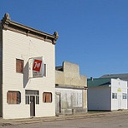

Model Prediction:  glacier


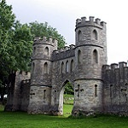

Model Prediction:  buildings


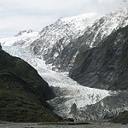

Model Prediction:  glacier


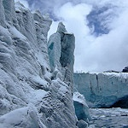

Model Prediction:  glacier


In [ ]:
import os
from random import randint
from PIL import Image

pred_list = []

dataset_dir = "/content/dataset/seg_train/seg_train"
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            pred_list.append(os.path.join(root, file))

for i in range(6):
    num = randint(0, len(pred_list))
    img = Image.open(pred_list[num])
    img = img.resize((128, 128))
    display(img)
    img_arr = np.array(img)
    img_arr = img_arr[np.newaxis, :]
    img_arr = img_arr.astype("float")
    img_arr = img_gen.standardize(img_arr)
    probability = model(img_arr)
    pred = np.argmax(probability)
    print("Model Prediction: ", idx_to_classes[pred])
    print("==========================================")



# SVM Model

Data preprocessing

In [ ]:
import os

dataset_dir = "/content/dataset/seg_train/seg_train/"

class_names = os.listdir(dataset_dir)

print(class_names)


['street', 'sea', 'buildings', 'mountain', 'glacier', 'forest']


In [ ]:
import cv2
import os
import numpy as np

X = []
Y = []
max_images_per_class = 1000
class_names = ['street', 'sea', 'buildings', 'mountain', 'glacier', 'forest']

for cls in class_names:
    pth = "/content/dataset/seg_train/seg_train/" + cls
    image_count = 0
    for j in os.listdir(pth):
        if image_count >= max_images_per_class:
            break
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        Y.append(cls)
        image_count += 1



In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X

array([[[255, 255, 255, ...,   3,   0,   3],
        [255, 255, 255, ...,   1,   1,   3],
        [255, 255, 255, ...,   2,   5,  11],
        ...,
        [ 69,  67,  61, ...,  29,   0,   1],
        [ 36,  36,  40, ...,  28,   0,   2],
        [ 38,  29,  33, ...,  21,   1,   1]],

       [[180, 175, 168, ...,  25,  25,  25],
        [186, 183, 171, ...,  25,  25,  25],
        [166, 162, 161, ...,  25,  24,  24],
        ...,
        [171, 173, 173, ...,  43,  45,  47],
        [169, 172, 168, ...,  35,  36,  37],
        [160, 168, 166, ...,  55,  51,  49]],

       [[ 15,  21,  26, ..., 113, 106, 118],
        [ 14,  15,  14, ...,  93,  48,   5],
        [ 22,  15,  14, ...,  43,   5,   9],
        ...,
        [ 60,  46,  50, ...,  88,  74,  94],
        [100,  43,  47, ...,  95,  68,  77],
        [ 99,  58,  53, ..., 107, 121, 118]],

       ...,

       [[ 46,  42,  48, ...,  85, 158, 106],
        [ 44,  49,  42, ...,  72, 161, 105],
        [ 37,  42,  46, ...,  73, 136, 178

In [ ]:
np.unique(Y)
Y

array(['street', 'street', 'street', ..., 'forest', 'forest', 'forest'],
      dtype='<U9')

In [ ]:
import pandas as pd
class_counts = pd.Series(Y).value_counts()
print(class_counts)


street       1000
sea          1000
buildings    1000
mountain     1000
glacier      1000
forest       1000
Name: count, dtype: int64


In [ ]:
X.shape,Y.shape

((6000, 128, 128), (6000,))

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(6000, 16384)

Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=0,test_size=0.2)

In [ ]:
xtrain.shape, xtest.shape

((4800, 16384), (1200, 16384))

Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',random_state=None)

In [ ]:
svm.fit(xtrain, ytrain)

SVC()

In [ ]:
ypred = svm.predict(xtest)

Model Performance

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

   buildings       0.52      0.41      0.46       199
      forest       0.57      0.74      0.65       199
     glacier       0.49      0.49      0.49       223
    mountain       0.53      0.58      0.55       194
         sea       0.39      0.34      0.36       187
      street       0.60      0.57      0.59       198

    accuracy                           0.52      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.52      0.52      0.52      1200



# Random Forest

Data Preprocessing

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder


dataset_dir = "/content/dataset/seg_train/seg_train"
categories = os.listdir(dataset_dir)
images = []
labels = []
num_images_per_category = 2500

In [ ]:
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    image_names = os.listdir(category_dir)[:num_images_per_category]
    for image_name in image_names:
        image_path = os.path.join(category_dir, image_name)
        image = cv2.imread(image_path)
        image_resized = cv2.resize(image, (128, 128))
        images.append(image_resized)
        labels.append(category)


In [ ]:
images = np.array(images)
labels = np.array(labels)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [ ]:
print("Shape of images array:", images.shape)
print("Shape of labels_encoded array:", labels_encoded.shape)


Shape of images array: (14022, 128, 128, 3)
Shape of labels_encoded array: (14022,)


Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


Scaling

In [ ]:

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_scaled.reshape(-1, 128*128*3), y_train)

RandomForestClassifier()

Prediction

In [ ]:
rf_pred = rf_classifier.predict(X_test_scaled.reshape(-1, 128*128*3))

Accuracy

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.6060606060606061


# Logistic Regression

Data preprocessing

In [ ]:
import cv2
import numpy as np
import os

X = []
Y = []
max_images_per_class = 1500


dataset_dir = "/content/dataset/seg_train/seg_train"

In [ ]:
for cls in os.listdir(dataset_dir):

    class_dir = os.path.join(dataset_dir, cls)

    num_images_processed = 0

    for image_file in os.listdir(class_dir):

        if num_images_processed >= max_images_per_class:
            break

        image = cv2.imread(os.path.join(class_dir, image_file), 0)

        image_resized = cv2.resize(image, (128, 128))

        X.append(image_resized)

        Y.append(cls)

        num_images_processed += 1

In [ ]:

X = np.array(X)
Y = np.array(Y)


X_flattened = X.reshape(X.shape[0], -1)

Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X_flattened, Y, test_size=0.2, random_state=42)


Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression()


logistic_model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [ ]:

accuracy = logistic_model.score(X_test, Y_test)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.31444444444444447


# KNN

Data preprocessing

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split


X = []
Y = []
max_images_per_class = 2500


dataset_dir = "/content/dataset/seg_train/seg_train"

In [ ]:
for cls in os.listdir(dataset_dir):

    class_dir = os.path.join(dataset_dir, cls)

    num_images_processed = 0

    for image_file in os.listdir(class_dir):

        if num_images_processed >= max_images_per_class:
            break

        image = cv2.imread(os.path.join(class_dir, image_file), 0)

        image_resized = cv2.resize(image, (128, 128))

        X.append(image_resized)

        Y.append(cls)

        num_images_processed += 1

In [ ]:
X = np.array(X)
Y = np.array(Y)
X_flattened = X.reshape(X.shape[0], -1)

Splitting training data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_flattened, Y, test_size=0.2, random_state=42)

Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)


KNeighborsClassifier()

Model evaluation

In [ ]:

accuracy = knn_classifier.score(X_test, Y_test)
print("K-Nearest Neighbors Accuracy:", accuracy)


K-Nearest Neighbors Accuracy: 0.30409982174688055
